<a href="https://colab.research.google.com/github/preethi-907/preethi-907.github.io/blob/main/Copy_of_detection_demo_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
ig = Image.open("/content/pexels-itfeelslikefilm-590471.jpg")

In [ ]:
transform = T.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[ 469.9126,  802.0089, 1423.1079, 2169.5059],
          [ 421.5720, 1598.5858,  728.8416, 1670.6851],
          [ 695.0153,  784.6590, 1476.3206, 2126.1333],
          [ 392.0482, 1600.3910,  738.8482, 1690.0068]]),
  'labels': tensor([ 1, 34, 88, 52]),
  'scores': tensor([0.9367, 0.0782, 0.0747, 0.0684])}]

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes , labels , scores = pred[0]["boxes"] , pred[0]["labels"] , pred[0]["scores"]

In [ ]:
scores > 0.8

tensor([ True, False, False, False])

In [ ]:
torch.argwhere(scores > 0.9)

tensor([[0]])

In [ ]:
torch.argwhere(scores > 0.9).shape[0]

1

In [ ]:
num = torch.argwhere(scores > 0.9).shape[0]

In [ ]:
num

1

In [ ]:
coco_names = ["person", "bicycle", "car",

"motorcycle", "airplane", "bus", "train", "truck", "boat",

"traffic light", "fire hydrant", "street sign", "stop sign",

"parking meter", "bench", "bird", "cat", "dog", "horse",

"sheep", "cow", "elephant", "bear", "zebra", "giraffe",

"hat", "backpack", "umbrella", "shoe", "eye glasses",

"handbag", "tie", "suitcase",

"frisbee", "skis", "snowboard", "sports ball", "kite",

"baseball bat"

"baseball glove", "skateboard", "surfboard", "tennis racket", "bottle",

"plate", "wine glass", "cup", "fork", "knife", "spoon", "bowl"

"banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",

"pizza", "donut", "cake", "chair", "couch", "potted plant","bed",

"mirror", "dining table", "window", "desk", "toilet",

"door", "tv",

"laptop", "mouse", "remote", "keyboard", "cell phone",

"microwave",

"oven", "toaster", "sink", "refrigerator", "blender", "book",

"clock", "vase", "scissors", "teddy bear", "hair drier",

"toothbrush", "hair brush"]

In [ ]:
igg = cv2.imread("/content/pexels-itfeelslikefilm-590471.jpg")
for i in range(num):
  x1 , y1 , x2 , y2 = bboxes[i].numpy().astype("int")
  print(x1 , y1 , x2 , y2)
  break

469 802 1423 2169


In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
igg = cv2.imread("/content/pexels-itfeelslikefilm-590471.jpg")
for i in range(num):
  x1 , y1 , x2 , y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i] - 1]
  igg = cv2.rectangle(igg , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 1)
  igg = cv2.putText(igg , class_name , (x1 , y1 - 10) , font , 0.5 , (255 , 0 , 0) , 1 , cv2.LINE_AA)

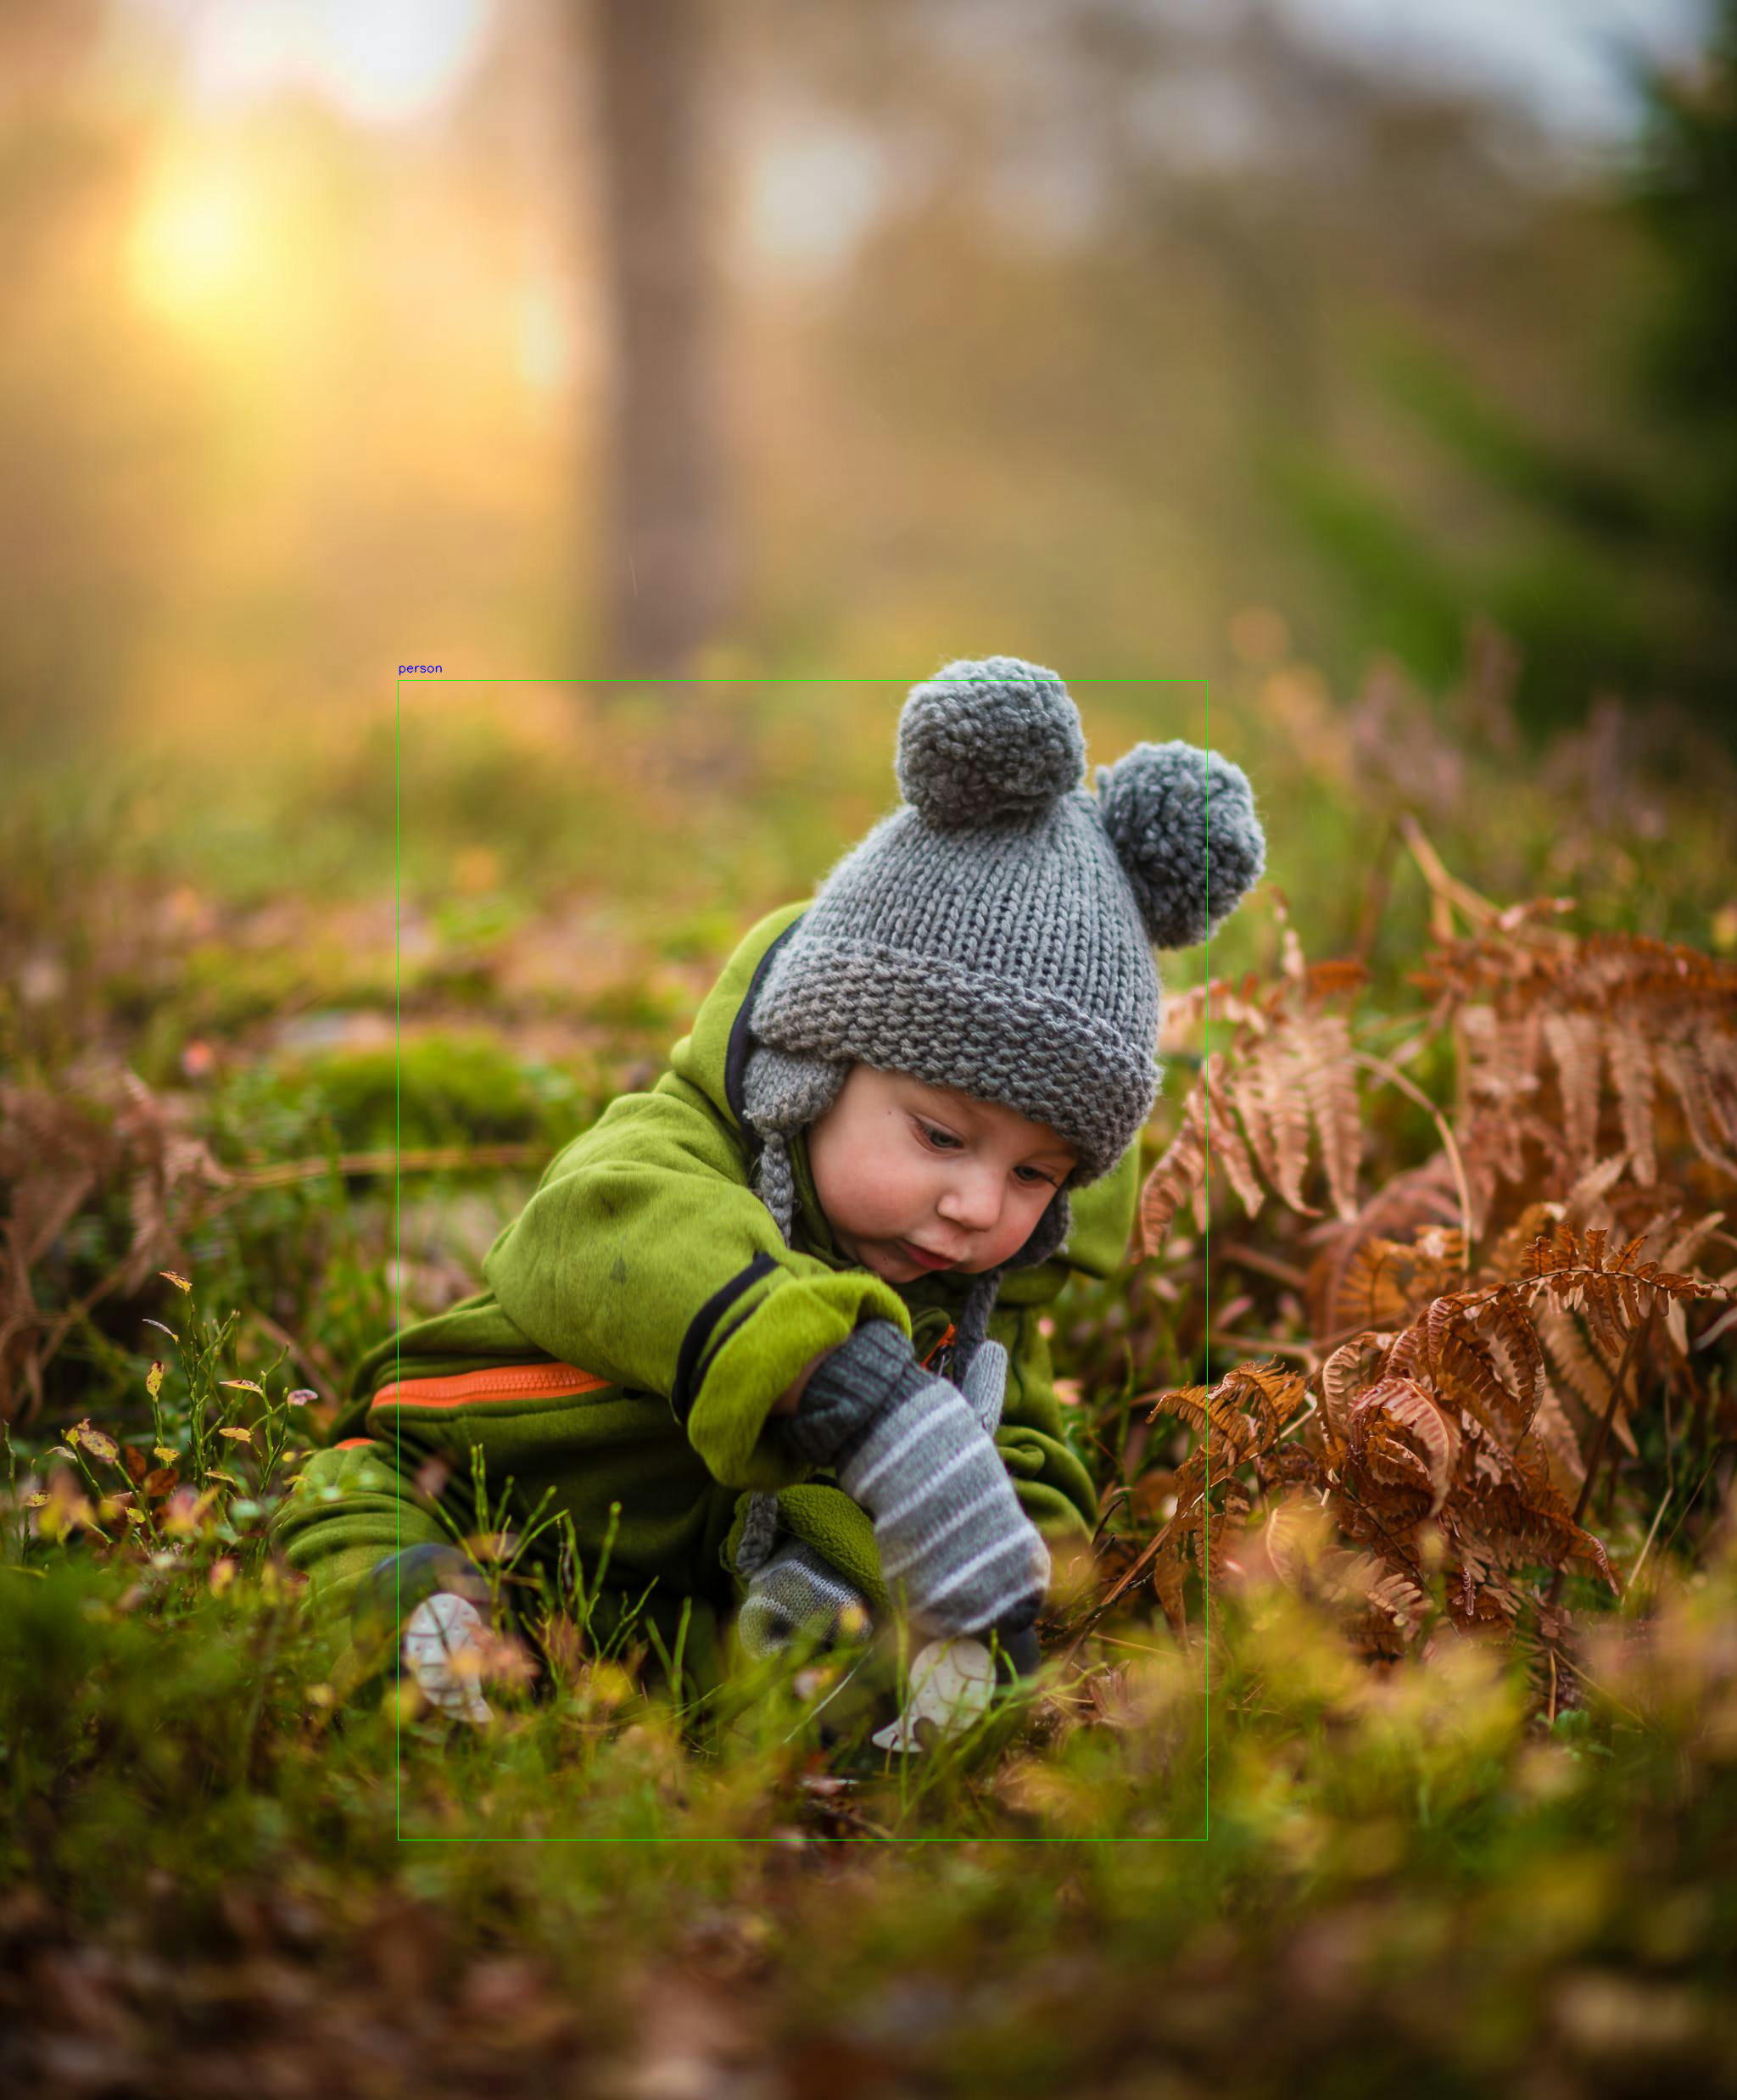

In [ ]:
cv2_imshow(igg)

In [ ]:
bboxes

tensor([[291.8007,  75.4907, 351.0379, 229.7333],
        [137.4995, 126.4641, 196.7451, 192.7782],
        [233.8998, 187.4761, 257.3713, 206.0314],
        [ 90.1807, 183.4493, 288.7284, 227.4105],
        [215.5326, 186.7111, 232.5018, 201.2200],
        [229.1946, 178.4547, 242.4028, 189.1366],
        [204.3889, 187.5528, 220.3058, 207.7724],
        [231.4346, 200.6802, 247.8696, 217.5509],
        [217.1698, 200.3502, 231.5009, 214.5559],
        [204.0359, 181.5956, 255.1724, 215.4856],
        [ 98.9669, 120.1149, 110.5809, 174.5165],
        [102.2467, 119.0014, 109.8358, 135.8731],
        [264.9863, 133.9124, 294.1249, 137.5284],
        [232.7792, 188.8490, 246.7510, 200.8903],
        [256.4788, 132.5554, 295.4839, 138.3106],
        [175.0202, 110.8700, 185.6927, 137.3661],
        [273.3569, 135.1965, 294.8690, 137.8414],
        [263.4073, 128.6209, 298.7946, 137.3732],
        [197.2355, 181.2733, 263.8223, 219.3763],
        [218.0015, 199.0363, 246.3781, 217.2725],


In [ ]:
labels

tensor([82, 79, 52, 67, 55, 55, 55, 55, 55, 55, 64, 64, 81, 52, 81, 44, 81, 81,
        51, 55, 81, 67, 81, 44, 55, 55, 82, 84, 55, 62, 52, 81, 86, 81, 52, 86,
        47, 55, 44, 67, 63, 52, 82, 81, 81, 44, 52, 55, 52, 55, 55, 81, 80, 55,
        44, 80, 62, 47, 81, 63, 55, 81, 55, 47])